# Task 1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
Sales = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S3_SuperstoreSales_Data_Challenge.csv")
Sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
Sales = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S3_SuperstoreSales_Data_Challenge.csv",index_col = "Order Date", parse_dates = True )
Sales.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
Sales = Sales[["Sales"]]
Sales.head()

,Sales
Order Date,
2016-08-11,261.9600
2016-08-11,731.9400
2016-12-06,14.6200
2015-11-10,957.5775
2015-11-10,22.3680


In [5]:
Sales.isnull().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='Order Date'>

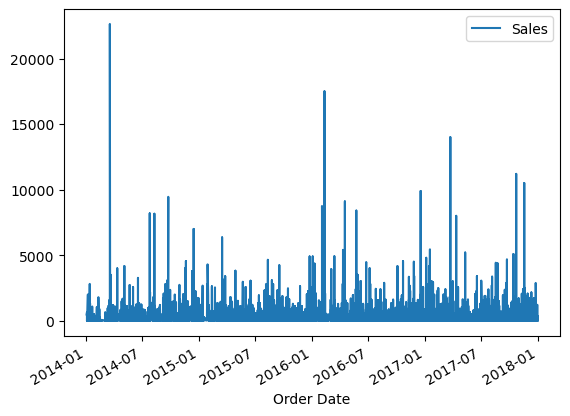

In [6]:
Sales.plot()

## Reshape

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
Sales.index = pd.to_datetime(Sales.index)

In [9]:
df_month = Sales.resample('M').sum()

In [10]:
decomposition = seasonal_decompose(df_month, period = 12)
decomposition

In [11]:
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

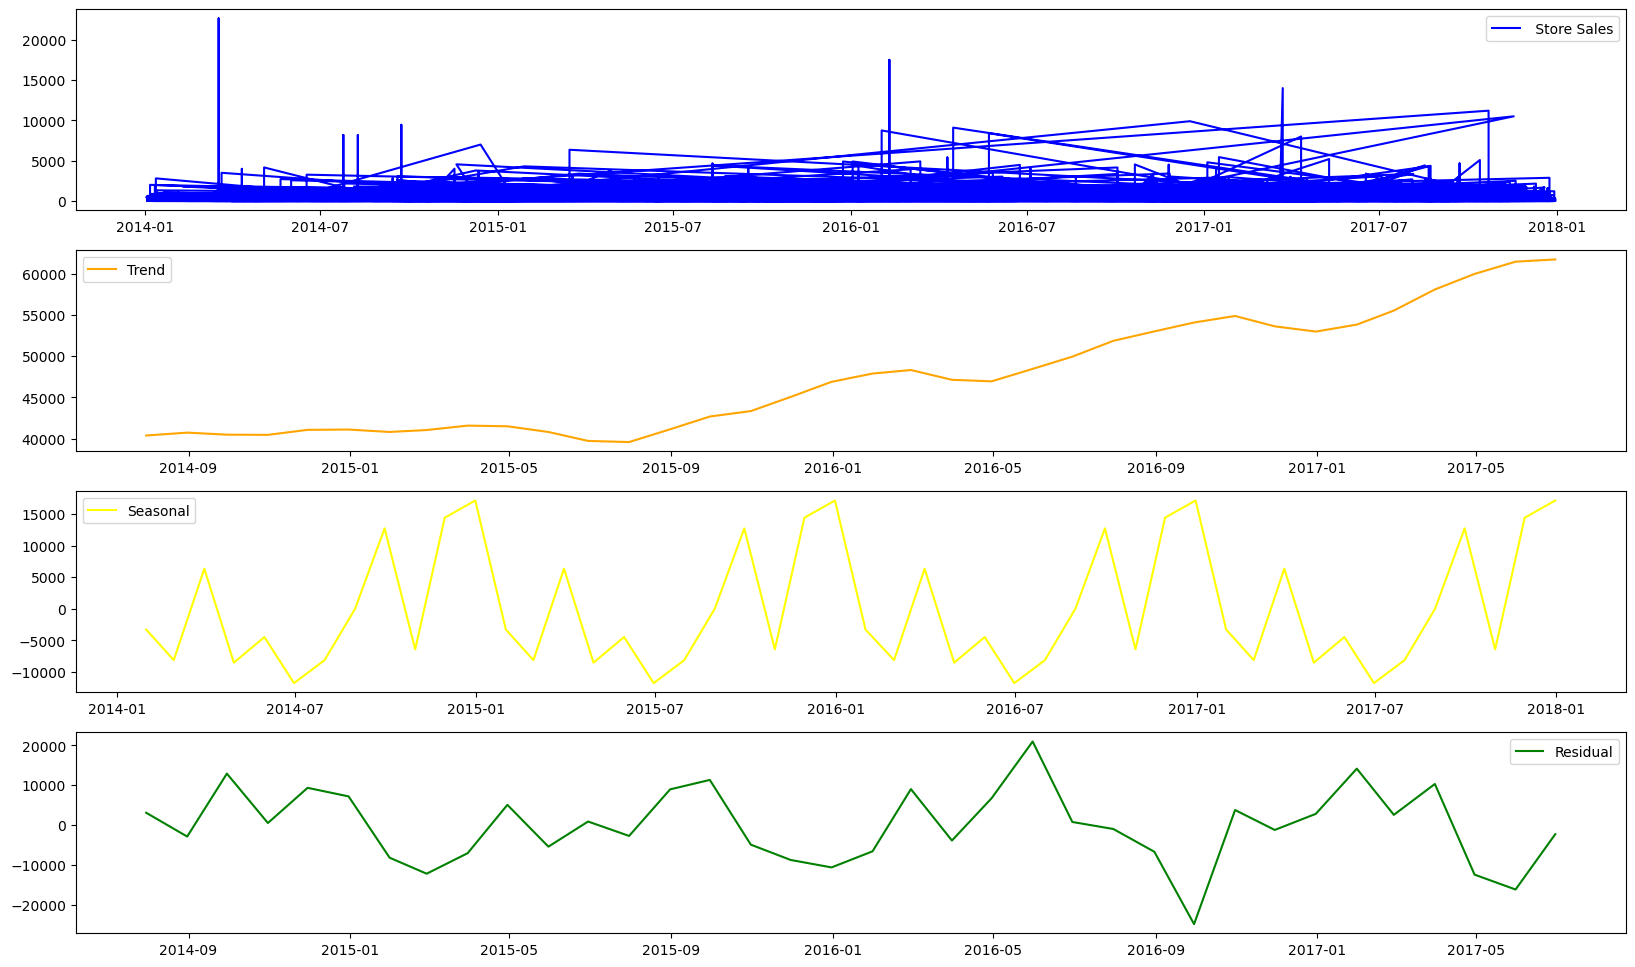

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(4,1,figsize=(20,12))


plt.subplot(411)
plt.plot(Sales,label=' Store Sales', color = 'blue')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend',color = 'orange')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color = 'yellow')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual',color = 'green' )
plt.legend(loc='best') 

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing

alpha = 0.8; beta = 0.5; gamma = 0.15

model3 = ExponentialSmoothing(df_month, trend= 'add', seasonal='add', seasonal_periods=12).fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)

In [14]:
predicted_model3 = model3.fittedvalues

In [15]:
df_month = predicted_model3

# Task 2 : Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [17]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is stationary. Proceed to model building".format(pvalue)
    else :
        msg = "pvalue = {}. Data is not stationary. Make the data stationary before model building"
    return msg

In [18]:
print(checkStationarity(df_month))

0.9676287037644712
pvalue = {}. Data is not stationary. Make the data stationary before model building


In [19]:
diff_Sales = df_month - df_month.shift()
diff_Sales

Order Date
2014-01-31             NaN
2014-02-28    -9740.267457
2014-03-31    17094.144682
2014-04-30     6429.421879
2014-05-31    -8497.605429
2014-06-30    -9839.814120
2014-07-31    10362.745422
2014-08-31    11938.877749
2014-09-30     7321.015664
2014-10-31    -2844.397978
2014-11-30     3540.864769
2014-12-31     8761.874519
2015-01-31   -13631.110895
2015-02-28   -35443.442747
2015-03-31    27859.076278
2015-04-30   -26122.037586
2015-05-31    30278.573556
2015-06-30   -16673.435482
2015-07-31     3242.345451
2015-08-31     2862.781421
2015-09-30    34375.661743
2015-10-31   -20411.009061
2015-11-30     5344.758039
2015-12-31   -11158.032479
2016-01-31   -15113.476053
2016-02-29       83.692772
2016-03-31    51208.091648
2016-04-30   -44292.944145
2016-05-31    11213.980273
2016-06-30    22169.723381
2016-07-31   -22564.457078
2016-08-31     4243.070425
2016-09-30     7435.898339
2016-10-31   -47234.930156
2016-11-30    63681.221328
2016-12-31    -4155.767616
2017-01-31   -159

In [20]:
diff_Sales.dropna(inplace = True)

In [21]:
print(checkStationarity(diff_Sales))

0.013612406761894158
pvalue = 0.013612406761894158. Data is stationary. Proceed to model building


# Task 3 :- Time series Models

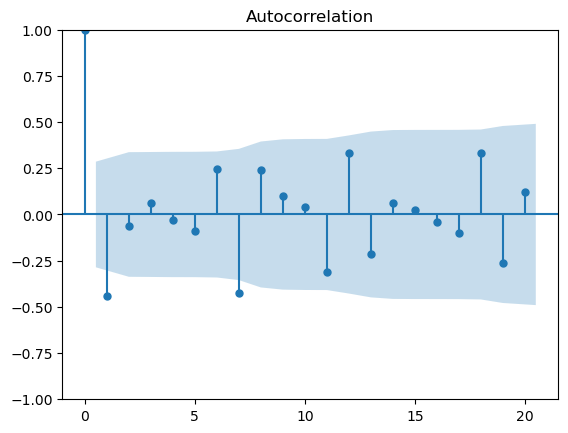

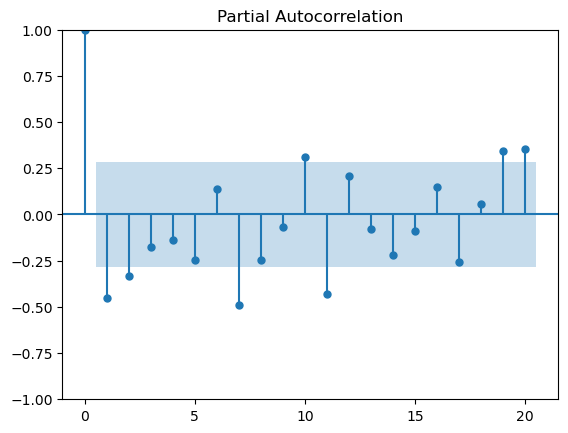

In [22]:
plot_acf(diff_Sales, lags = 20);
plot_pacf(diff_Sales, lags= 20);

# AR Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA

ar_m1 = ARIMA (diff_Sales, order = (1,0,0))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -532.536
Date:                Mon, 27 Feb 2023   AIC                           1071.071
Time:                        16:53:26   BIC                           1076.622
Sample:                    02-28-2014   HQIC                          1073.160
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.1598   2085.081      0.644      0.520   -2744.523    5428.843
ar.L1         -0.4364      0.125     -3.484      0.000      -0.682      -0.191
sigma2      4.113e+08      0.003    1.3e+11      0.0

In [24]:
ar_m2 = ARIMA (diff_Sales, order = (2,0,0))
r2 = ar_m2.fit()
print(r2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -530.011
Date:                Mon, 27 Feb 2023   AIC                           1068.021
Time:                        16:53:26   BIC                           1075.422
Sample:                    02-28-2014   HQIC                          1070.806
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.1598   1525.286      0.880      0.379   -1647.346    4331.665
ar.L1         -0.5809      0.137     -4.245      0.000      -0.849      -0.313
ar.L2         -0.3186      0.178     -1.787      0.0

The value of p with the minimum AIC is 10 (AIC=1047.421)

# MA Model

In [27]:
d = 0
p = 0

min_aic = np.inf
min_q = -1

for q in range(1, 8):
    ma_model = sm.tsa.ARIMA(diff_Sales, order=(p, d, q))
    result = ma_model.fit()
    
    print(f"ARIMA({p}, {d}, {q}) Results:")
    print(result.summary())
    
    if result.aic < min_aic:
        min_aic = result.aic
        min_q = q

print(f"The value of q with the minimum AIC is {min_q} (AIC={min_aic}).")


ARIMA(0, 0, 1) Results:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -525.710
Date:                Mon, 27 Feb 2023   AIC                           1057.419
Time:                        16:54:31   BIC                           1062.970
Sample:                    02-28-2014   HQIC                          1059.508
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        784.1873    158.144      4.959      0.000     474.231    1094.144
ma.L1         -0.9971      0.216     -4.607      0.000      -1.421      -0.573
sigma2      2.806e+08   6.91

In [ ]:
The value of q with the minimum AIC is 1 (AIC=1057.419)

# MODEL BUILDING - ARMA

In [28]:
ss = int(0.7 * len(diff_Sales))

train = diff_Sales.iloc[:ss]
test = diff_Sales.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 32, test = 15


In [29]:
p = 2; q =1

m1 = ARIMA(diff_Sales, order= (p,0,q))
r1 = m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -526.340
Date:                Mon, 27 Feb 2023   AIC                           1062.679
Time:                        16:55:37   BIC                           1071.930
Sample:                    02-28-2014   HQIC                          1066.160
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        786.4906    292.218      2.691      0.007     213.754    1359.227
ar.L1          0.1078      0.237      0.455      0.649      -0.357       0.573
ar.L2         -0.0149      0.218     -0.068      0.9

## LJung Box Test

In [30]:
pvalue = sm.stats.acorr_ljungbox(r1.resid, lags=[1], return_df= True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print("Reject H0 . Bad Model")
else:
    print("Fail-to-Reject H0. Hence the select model is Good Model")

[0.89124919]
Fail-to-Reject H0. Hence the select model is Good Model


In [31]:
# predictions 
predictions = r1.predict(0,len(test)-1)
print(predictions)

Order Date
2014-02-28      786.490647
2014-03-31     5402.523829
2014-04-30    -5301.159262
2014-05-31    -7760.696000
2014-06-30      295.648301
2014-07-31     8263.735322
2014-08-31      172.573577
2014-09-30    -8466.143007
2014-10-31   -12719.457118
2014-11-30    -8591.364292
2014-12-31    -9888.433501
2015-01-31   -15478.024274
2015-02-28    -2589.370289
2015-03-31    27558.225987
2015-04-30     3963.279751
Freq: M, Name: predicted_mean, dtype: float64


In [32]:
actual = []; pred =[]

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])
    
df_res = pd.DataFrame({'actual': actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

          actual     predicted           err
0  -47234.930156    786.490647 -48021.420803
1   63681.221328   5402.523829  58278.697499
2   -4155.767616  -5301.159262   1145.391646
3  -15934.999842  -7760.696000  -8174.303842
4    7674.993398    295.648301   7379.345098
5    9636.444989   8263.735322   1372.709668
6   -6174.038687    172.573577  -6346.612264
7  -25329.923900  -8466.143007 -16863.780893
8  -15025.005503 -12719.457118  -2305.548384
9   28434.755875  -8591.364292  37026.120167
10  14418.992639  -9888.433501  24307.426140
11  26748.311044 -15478.024274  42226.335317
12 -32525.060339  -2589.370289 -29935.690050
13  20184.809389  27558.225987  -7373.416598
14   9247.140324   3963.279751   5283.860573


# Calcluate MSE and RMSE of the model from test

In [33]:
msg = 'ARMA Model. Order = (2,1)'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}". format(mse1,np.sqrt(mse1)))

ARMA Model. Order = (2,1)
	MSE = 725346382.9449004
	RMSE = 26932.25543739143


Text(0.5, 1.0, 'ARMA Model. Order = (2,1)')

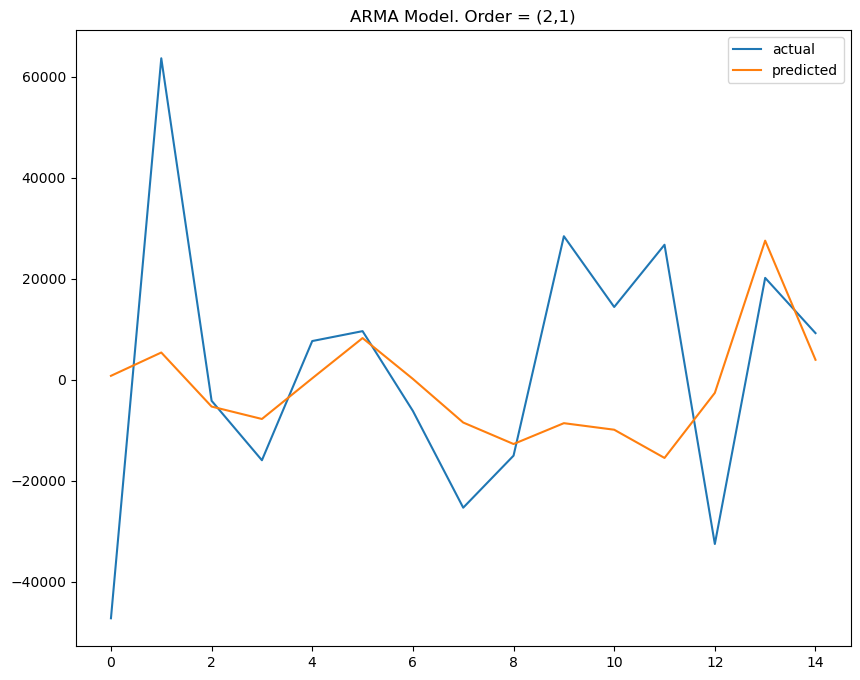

In [34]:
df_res.actual.plot(figsize = (10,8), legend = True)
df_res.predicted.plot(legend = True)
plt.title(msg)